In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet
from solver import Solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


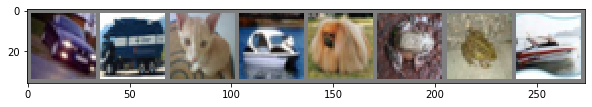

       car    truck      cat     ship      dog     frog     frog     ship


In [4]:
batch_size = 64
subset_size = 6400
random_labels = False
#trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4, subset_indices=subset_indices)

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size, subset_size=subset_size, random_labels=random_labels)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size)
classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
# net = models.vgg16(pretrained=False)

# testloader=None
solver = Solver(net, trainloader, validationloader=testloader, optim = 'adam', num_epochs=10, 
                log_every=10000, plot=True, verbose=True)

In [ ]:
solver.train()

Loading BokehJS ...

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    1,        99]    2.07800003 |        0.22885101
----------------------------------------------------
[    1,  finished]     accuracy: |        0.32330000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    2,        99]    1.83235146 |        0.32591540
----------------------------------------------------
[    2,  finished]     accuracy: |        0.37130000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------


In [ ]:
solver.print_bokeh_plots()

In [ ]:
PATH = './cifar_net.pth'
solver.save_model(PATH)

In [ ]:
solver.predict_samples(classes)

In [ ]:
solver.print_class_accuracies(classes)

In [ ]:
solver.print_log()